Coletando Dados: 100%|███████████████████████████████████████████████| 60/60 [01:06<00:00,  1.11s/s]


Verificando os primeiros dados do DataFrame:
   Timestamp  Temperature (C)  Humidity (%)  Pressure (hPa)  Acc X  Acc Y  \
0     506.82            18.73         75.48           98.17   0.01   0.01   
1     507.82            18.73         75.47           98.17   0.01   0.02   
2     508.82            18.73         75.46           98.17   0.01   0.01   
3     509.82            18.72         75.45           98.17   0.01   0.01   
4     510.82            18.72         75.43           98.17   0.01   0.01   

   Acc Z  Gyro X  Gyro Y  Gyro Z  Mag X  Mag Y  Mag Z  
0    1.0    0.43   -0.12    0.12   52.0   96.0 -115.0  
1    1.0    0.37   -0.12    0.18   49.0   94.0 -117.0  
2    1.0    0.37   -0.12    0.18   53.0   95.0 -120.0  
3    1.0    0.37   -0.06    0.12   51.0   95.0 -115.0  
4    1.0    0.37   -0.12    0.06   52.0   94.0 -115.0  
Estatísticas Descritivas:
       Timestamp  Temperature (C)  Humidity (%)  Pressure (hPa)         Acc X  \
count   60.00000        60.000000     60.000000  

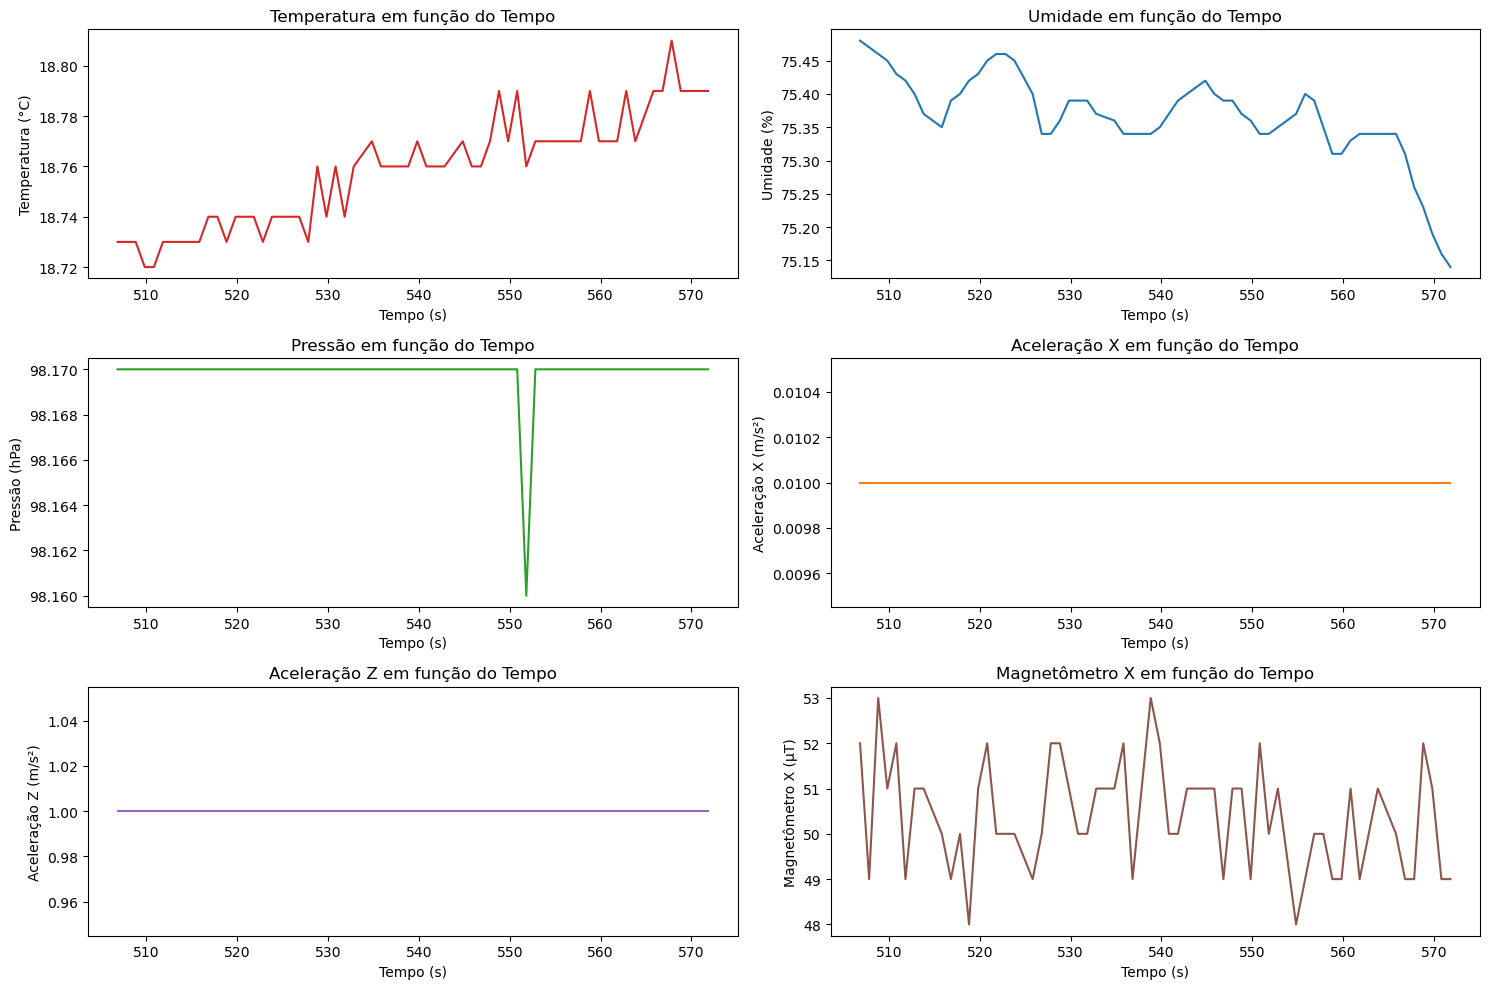

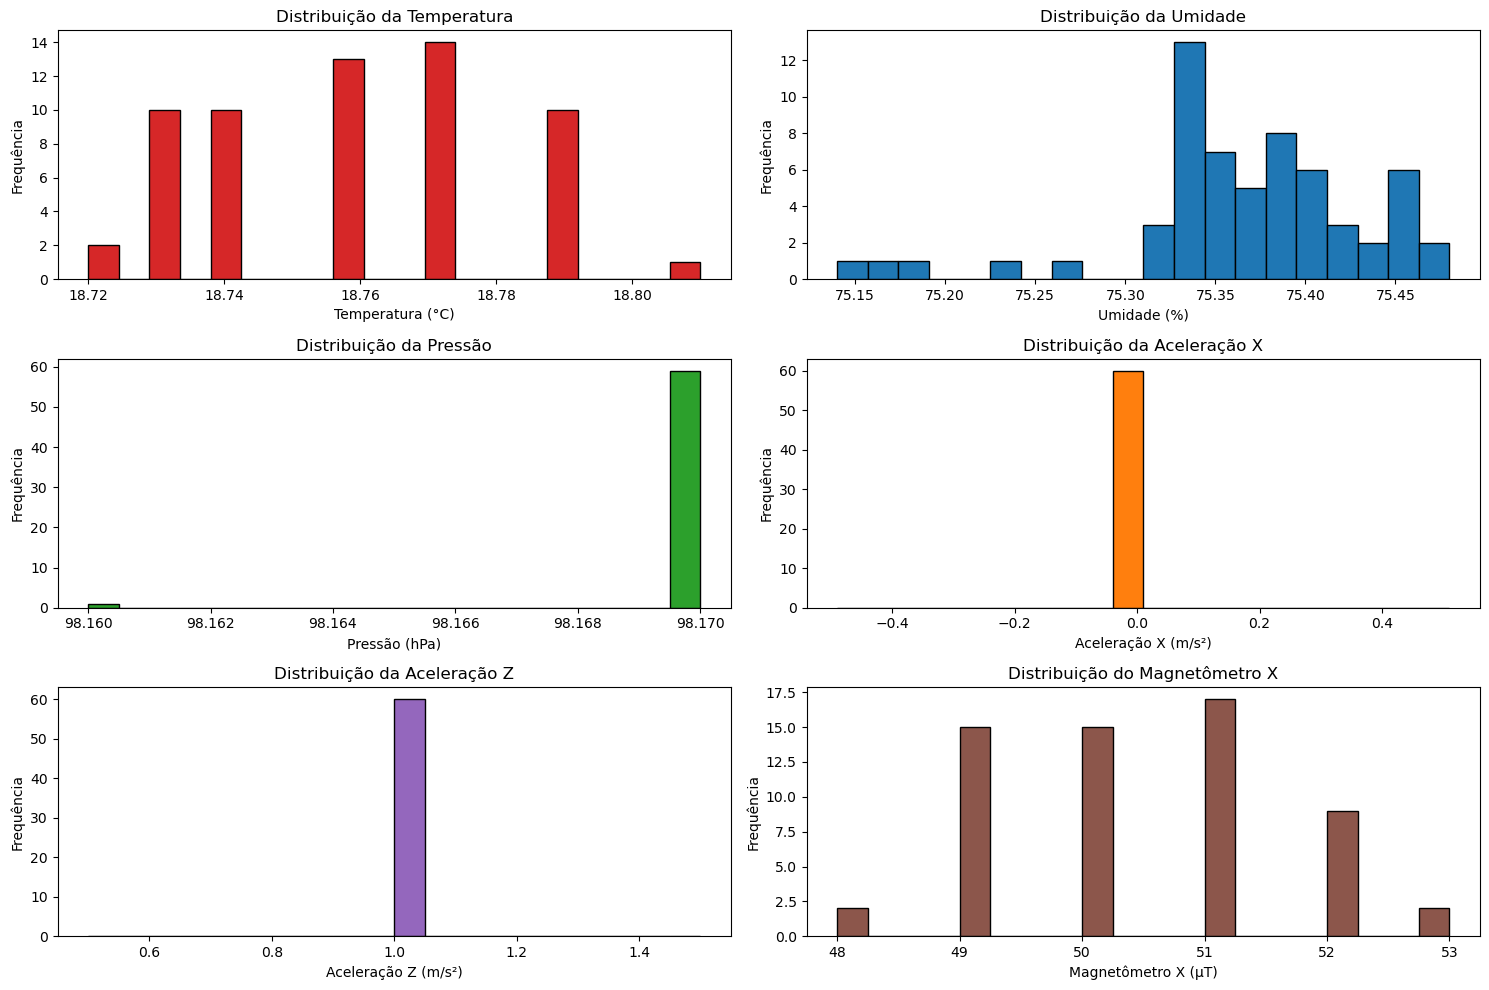

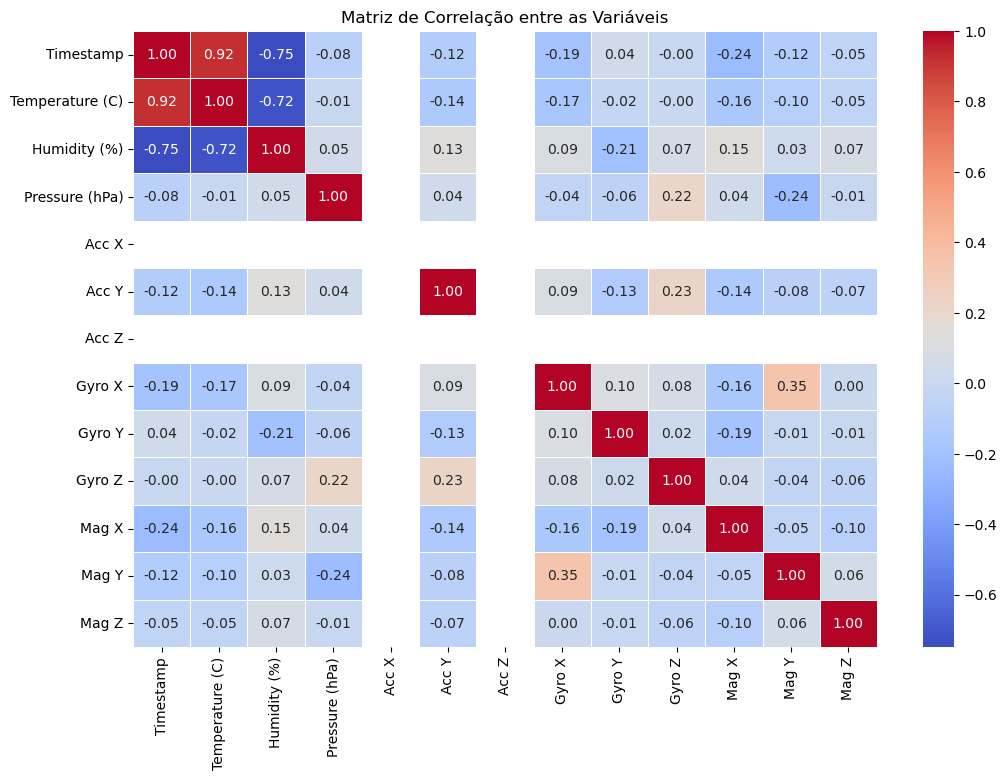

In [3]:
import serial
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barra de progresso
import seaborn as sns

# Configuração da porta serial (ajuste conforme necessário)
port = '/dev/ttyACM1'  # Porta do Arduino
baud_rate = 9600  # Taxa de Baud
duration = 60  # Tempo de coleta (1 minuto)
interval = 1  # Intervalo entre coletas (1 segundo)

# Inicializa a conexão serial
ser = serial.Serial(port, baud_rate)
time.sleep(2)  # Aguarda a inicialização da comunicação serial

# Lista para armazenar os dados
timestamps = []
temperatures = []
humidities = []
pressures = []
acc_x_values = []
acc_y_values = []
acc_z_values = []
gyro_x_values = []
gyro_y_values = []
gyro_z_values = []
mag_x_values = []
mag_y_values = []
mag_z_values = []

# Coleta dados por 1 minuto (60 segundos)
start_time = time.time()

# Barra de progresso
with tqdm(total=duration, desc="Coletando Dados", unit="s", ncols=100) as pbar:
    for _ in range(duration):
        timestamp = None
        temperature = None
        humidity = None
        pressure = None
        acc_x = None
        acc_y = None
        acc_z = None
        gyro_x = None
        gyro_y = None
        gyro_z = None
        mag_x = None
        mag_y = None
        mag_z = None
        
        # Armazena os dados temporários durante 1 segundo
        end_time = time.time() + interval  # Define o tempo final para 1 segundo
        while time.time() < end_time:
            line = ser.readline().decode('utf-8').strip()
            
            # Processa a linha de acordo com o tipo de dado
            if line.startswith("Timestamp"):
                timestamp = float(line.split(': ')[1].strip().replace(' s', ''))  # Remove 's' do timestamp
            elif line.startswith("Temperatura"):
                temperature = float(line.split(': ')[1].strip().replace(' ºC', ''))
            elif line.startswith("Umidade"):
                humidity = float(line.split(': ')[1].strip().replace(' %', ''))
            elif line.startswith("Pressão"):
                pressure = float(line.split(': ')[1].strip().replace(' hPa', ''))
            elif line.startswith("Aceleração X"):
                acc_x = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Aceleração Y"):
                acc_y = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Aceleração Z"):
                acc_z = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Giroscópio X"):
                gyro_x = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Giroscópio Y"):
                gyro_y = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Giroscópio Z"):
                gyro_z = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Magnetômetro X"):
                mag_x = float(line.split(': ')[1].strip().replace(' µT', ''))
            elif line.startswith("Magnetômetro Y"):
                mag_y = float(line.split(': ')[1].strip().replace(' µT', ''))
            elif line.startswith("Magnetômetro Z"):
                mag_z = float(line.split(': ')[1].strip().replace(' µT', ''))
        
        # Quando todos os dados de um conjunto estão presentes, salva no CSV
        if None not in [timestamp, temperature, humidity, pressure, acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, mag_x, mag_y, mag_z]:
            # Armazena os dados
            timestamps.append(timestamp)
            temperatures.append(temperature)
            humidities.append(humidity)
            pressures.append(pressure)
            acc_x_values.append(acc_x)
            acc_y_values.append(acc_y)
            acc_z_values.append(acc_z)
            gyro_x_values.append(gyro_x)
            gyro_y_values.append(gyro_y)
            gyro_z_values.append(gyro_z)
            mag_x_values.append(mag_x)
            mag_y_values.append(mag_y)
            mag_z_values.append(mag_z)
        
        pbar.update(1)  # Atualiza a barra de progresso a cada segundo

    # Fecha a conexão serial
    ser.close()

# Cria um DataFrame com os dados
data = {
    'Timestamp': timestamps,
    'Temperature (C)': temperatures,
    'Humidity (%)': humidities,
    'Pressure (hPa)': pressures,
    'Acc X': acc_x_values,
    'Acc Y': acc_y_values,
    'Acc Z': acc_z_values,
    'Gyro X': gyro_x_values,
    'Gyro Y': gyro_y_values,
    'Gyro Z': gyro_z_values,
    'Mag X': mag_x_values,
    'Mag Y': mag_y_values,
    'Mag Z': mag_z_values
}
df = pd.DataFrame(data)

# Verifique se os dados de pressão e aceleração estão no DataFrame
print("Verificando os primeiros dados do DataFrame:")
print(df.head())  # Verificar se os dados estão presentes e corretos

# Remove qualquer linha com dados ausentes (NaN)
df = df.dropna()

# Salva os dados em um arquivo CSV
df.to_csv('sensor_data.csv', index=False)

# **Processamento dos dados adquiridos: Estatística descritiva**
statistics = df.describe()

# Exibe a estatística descritiva
print("Estatísticas Descritivas:")
print(statistics)

# **Gráficos das grandezas em função do tempo**
plt.figure(figsize=(15, 10))

# Temperatura
plt.subplot(3, 2, 1)
plt.plot(df['Timestamp'], df['Temperature (C)'], color='tab:red')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura em função do Tempo')

# Umidade
plt.subplot(3, 2, 2)
plt.plot(df['Timestamp'], df['Humidity (%)'], color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Umidade (%)')
plt.title('Umidade em função do Tempo')

# Pressão
plt.subplot(3, 2, 3)
plt.plot(df['Timestamp'], df['Pressure (hPa)'], color='tab:green')
plt.xlabel('Tempo (s)')
plt.ylabel('Pressão (hPa)')
plt.title('Pressão em função do Tempo')

# Aceleração X
plt.subplot(3, 2, 4)
plt.plot(df['Timestamp'], df['Acc X'], color='tab:orange')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração X (m/s²)')
plt.title('Aceleração X em função do Tempo')

# Aceleração Z
plt.subplot(3, 2, 5)
plt.plot(df['Timestamp'], df['Acc Z'], color='tab:purple')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração Z (m/s²)')
plt.title('Aceleração Z em função do Tempo')

# Magnetômetro X
plt.subplot(3, 2, 6)
plt.plot(df['Timestamp'], df['Mag X'], color='tab:brown')
plt.xlabel('Tempo (s)')
plt.ylabel('Magnetômetro X (µT)')
plt.title('Magnetômetro X em função do Tempo')

plt.tight_layout()
plt.show()

# **Visualização dos histogramas de cada sensor**
plt.figure(figsize=(15, 10))

# Histogramas para cada variável
plt.subplot(3, 2, 1)
plt.hist(df['Temperature (C)'], bins=20, color='tab:red', edgecolor='black')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.title('Distribuição da Temperatura')

plt.subplot(3, 2, 2)
plt.hist(df['Humidity (%)'], bins=20, color='tab:blue', edgecolor='black')
plt.xlabel('Umidade (%)')
plt.ylabel('Frequência')
plt.title('Distribuição da Umidade')

plt.subplot(3, 2, 3)
plt.hist(df['Pressure (hPa)'], bins=20, color='tab:green', edgecolor='black')
plt.xlabel('Pressão (hPa)')
plt.ylabel('Frequência')
plt.title('Distribuição da Pressão')

plt.subplot(3, 2, 4)
plt.hist(df['Acc X'], bins=20, color='tab:orange', edgecolor='black')
plt.xlabel('Aceleração X (m/s²)')
plt.ylabel('Frequência')
plt.title('Distribuição da Aceleração X')

plt.subplot(3, 2, 5)
plt.hist(df['Acc Z'], bins=20, color='tab:purple', edgecolor='black')
plt.xlabel('Aceleração Z (m/s²)')
plt.ylabel('Frequência')
plt.title('Distribuição da Aceleração Z')

plt.subplot(3, 2, 6)
plt.hist(df['Mag X'], bins=20, color='tab:brown', edgecolor='black')
plt.xlabel('Magnetômetro X (µT)')
plt.ylabel('Frequência')
plt.title('Distribuição do Magnetômetro X')

plt.tight_layout()
plt.show()

# **Correlação entre variáveis**
correlation_matrix = df.corr()

# Gráfico de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()
